# Example: Prostate Cancer

## Import 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Load Data

In [2]:
df = pd.read_csv("../data/prostate.csv", delimiter='\t')

In [3]:
df

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T
...,...,...,...,...,...,...,...,...,...,...
92,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147,T
93,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443,T
94,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124,F
95,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509,T


In [4]:
df = df.drop(["train"], axis=1)

In [5]:
df

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564
...,...,...,...,...,...,...,...,...,...
92,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147
93,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443
94,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124
95,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509


In [6]:
X = df.drop(["lpsa"], axis=1)

In [7]:
y = df["lpsa"]

In [8]:
X

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0
...,...,...,...,...,...,...,...,...
92,2.830268,3.876396,68,-1.386294,1,1.321756,7,60
93,3.821004,3.896909,44,-1.386294,1,2.169054,7,40
94,2.907447,3.396185,52,-1.386294,1,2.463853,7,10
95,2.882564,3.773910,68,1.558145,1,1.558145,7,80


In [9]:
y

0    -0.430783
1    -0.162519
2    -0.162519
3    -0.162519
4     0.371564
        ...   
92    4.385147
93    4.684443
94    5.143124
95    5.477509
96    5.582932
Name: lpsa, Length: 97, dtype: float64

In [10]:
X = sm.add_constant(X)
X

,const,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
0,1.0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0
1,1.0,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0
2,1.0,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20
3,1.0,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0
4,1.0,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0
...,...,...,...,...,...,...,...,...,...
92,1.0,2.830268,3.876396,68,-1.386294,1,1.321756,7,60
93,1.0,3.821004,3.896909,44,-1.386294,1,2.169054,7,40
94,1.0,2.907447,3.396185,52,-1.386294,1,2.463853,7,10
95,1.0,2.882564,3.773910,68,1.558145,1,1.558145,7,80


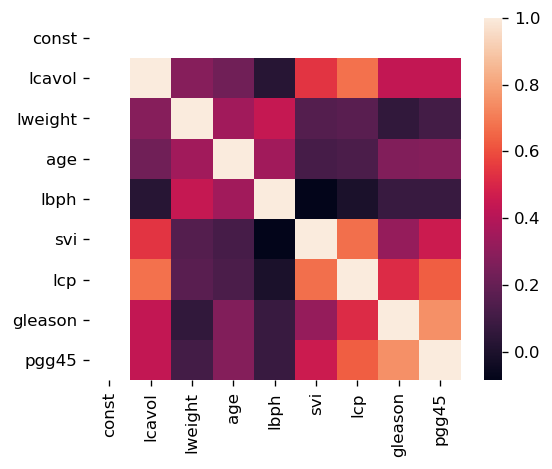

In [11]:
plt.figure(figsize=(5,4), dpi=120)
sns.heatmap(X.corr())
plt.show()

## Model 1 - Include All

In [12]:
model = sm.OLS(y,X).fit()

In [13]:
predict = model.predict(X)

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lpsa   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     21.68
Date:                Thu, 22 Apr 2021   Prob (F-statistic):           7.65e-18
Time:                        21:32:26   Log-Likelihood:                -98.248
No. Observations:                  97   AIC:                             214.5
Df Residuals:                      88   BIC:                             237.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1816      1.321      0.137      0.891      -2.443       2.806
lcavol         0.5643      0.088      6.425      0.000       0.390       0.739
lweight        0.6220      0.201      3.096      0.003       0.223       1.021
age           -0.0212      0.011     -1.917      0.058      -0.043       0.001
lbph           0.0967      0.058      1.670      0.098      -0.018       0.212
svi            0.7617      0.241      3.158      0.002       0.282       1.241
lcp           -0.1061      0.090     -1.180      0.241      -0.285       0.073
gleason        0.0492      0.155      0.317      0.752      -0.259       0.358
pgg45          0.0045      0.004      1.021      0.310      -0.004       0.013
==============================================================================
Omnibus:                        0.563   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.755   Jarque-Bera (JB):                0.183
Skew:                           0.017   Prob(JB):                        0.913
Kurtosis:                       3.210   Cond. No.                     1.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model 2 - Remove $p > 0.05$

In [15]:
X2 = df.drop(["lpsa", "age", "lbph", "lcp", "gleason", "pgg45"], axis=1)
X2 = sm.add_constant(X2)
X2

,const,lcavol,lweight,svi
0,1.0,-0.579818,2.769459,0
1,1.0,-0.994252,3.319626,0
2,1.0,-0.510826,2.691243,0
3,1.0,-1.203973,3.282789,0
4,1.0,0.751416,3.432373,0
...,...,...,...,...
92,1.0,2.830268,3.876396,1
93,1.0,3.821004,3.896909,1
94,1.0,2.907447,3.396185,1
95,1.0,2.882564,3.773910,1


In [16]:
model2 = sm.OLS(y, X2).fit()

In [17]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lpsa   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     54.15
Date:                Thu, 22 Apr 2021   Prob (F-statistic):           2.44e-20
Time:                        21:32:26   Log-Likelihood:                -102.05
No. Observations:                  97   AIC:                             212.1
Df Residuals:                      93   BIC:                             222.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7772      0.623     -1.247      0.215      -2.014       0.460
lcavol         0.5259      0.075      7.024      0.000       0.377       0.675
lweight        0.6618      0.176      3.768      0.000       0.313       1.011
svi            0.6657      0.207      3.214      0.002       0.254       1.077
==============================================================================
Omnibus:                        0.099   Durbin-Watson:                   1.501
Prob(Omnibus):                  0.952   Jarque-Bera (JB):                0.215
Skew:                          -0.069   Prob(JB):                        0.898
Kurtosis:                       2.815   Cond. No.                         36.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""